In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Загрузите датасет breast_cancer.

In [ ]:
# загрузка датасета

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
# Ознакамливаемся со структурой датасета

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [ ]:
X = cancer.data[:, :2]
X.shape

(569, 2)

In [ ]:
# проверка того что мы действительно взяли два столбца из data
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [ ]:
Y = cancer.target
Y.shape

(569,)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

**Вывод:** размерность строк у нас одинаковая - значит с датасетом можно работать дальше

Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [ ]:
# Разделяем на test и train датасеты с помощью метода train_test_split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

In [ ]:
# print(x_train.shape)
# print(y_train.shape)

In [ ]:
# print(x_test.shape)
# print(y_test.shape)

Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [ ]:
from sklearn import svm
clf = svm.SVC(C=0.01)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

Train:  0.7384615384615385
Test 0.6929824561403509


Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):

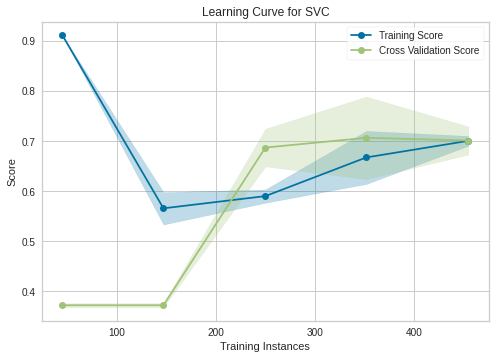

In [ ]:

from yellowbrick.model_selection import LearningCurve
learncurve = LearningCurve(clf).fit(X, Y)
learncurve.show()

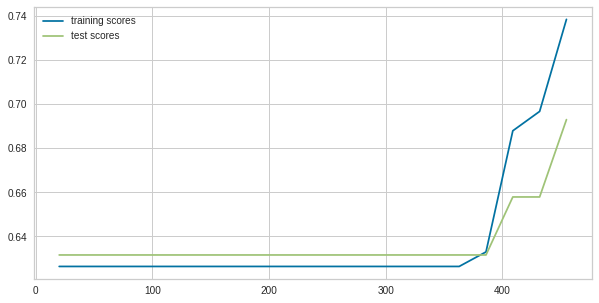

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(x_train), 20):
    clf = SVC(C=0.01)
    X = x_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

Train:  0.6263736263736264
Test 0.631578947368421


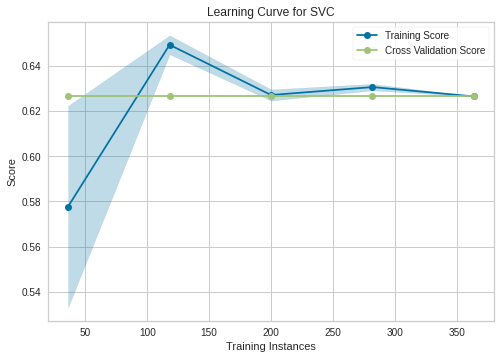

In [ ]:
# недо
clf = svm.SVC(C=0.0001)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

Train:  0.9142857142857143
Test 0.8333333333333334


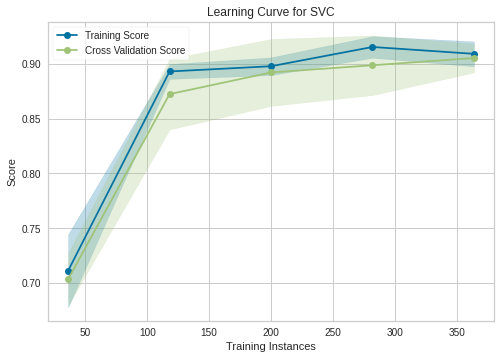

In [ ]:
clf = svm.SVC(C=0.1)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

Train:  0.9296703296703297
Test 0.8157894736842105


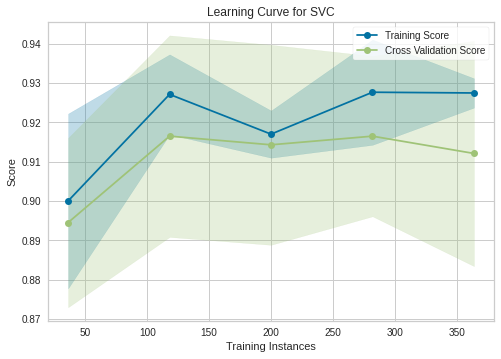

In [ ]:
clf = svm.SVC(C=10)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

Train:  0.9274725274725275
Test 0.8421052631578947


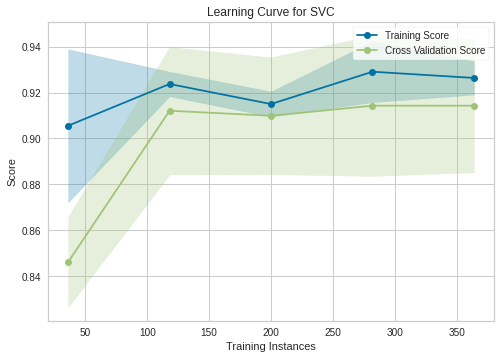

In [ ]:
clf = svm.SVC(C=100)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

Train:  0.9274725274725275
Test 0.8333333333333334


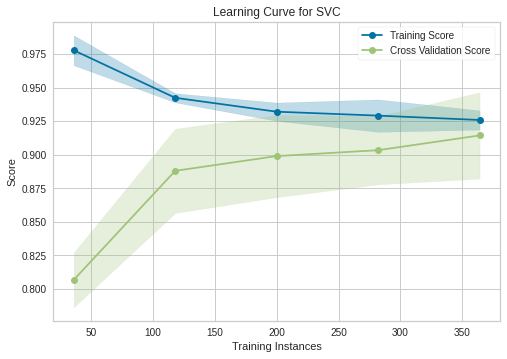

In [ ]:
clf = svm.SVC(C=100000)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

In [ ]:
C1 = list(np.linspace(0.0001, 1, num = 10)) 
C2 = list(np.linspace(1, 10000, num = 10 ))
test1 = []
train1 = []
test2 = []
train2 = []
for c in range(len(C1)):
    clf = SVC(C = C1[c])
    clf.fit(x_train, y_train)
    train1.append(clf.score(x_train, y_train))
    test1.append(clf.score(x_test, y_test))
    
    clf = SVC(C = C2[c])
    clf.fit(x_train, y_train)
    train2.append(clf.score(x_train, y_train))
    test2.append(clf.score(x_test, y_test))

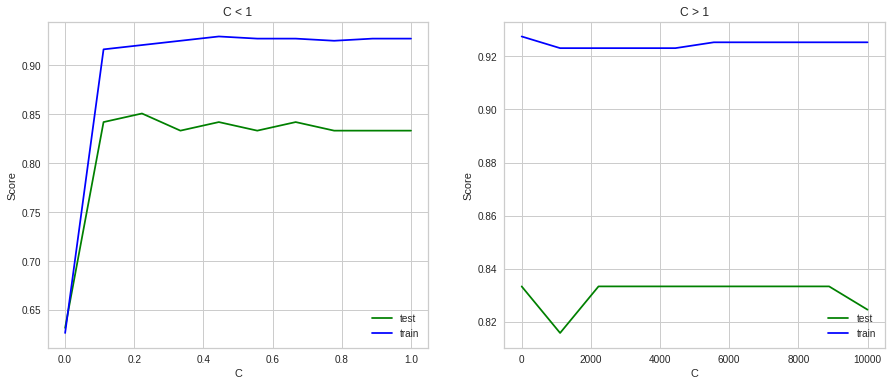

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot( C1, test1, label = "test", color ="green")   
plt.plot(C1,train1, label = "train", color ="blue")
plt.title("С < 1")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()

plt.subplot(122)
plt.plot( C2, test2, label = "test", color ="green")   
plt.plot(C2,train2, label = "train", color ="blue")
plt.title("C > 1")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()

Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

Train:  0.9142857142857143
Test 0.8333333333333334


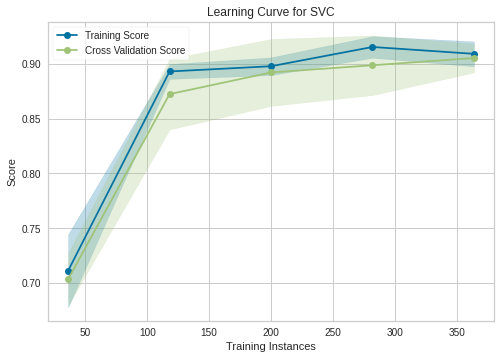

In [ ]:
clf = svm.SVC(C=0.1)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

Train:  0.9230769230769231
Test 0.8333333333333334


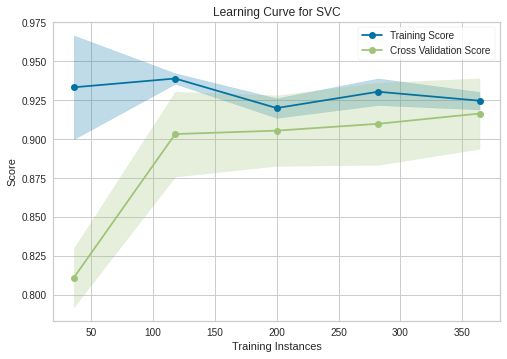

In [ ]:
clf = svm.SVC(C=4500)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

In [ ]:
C1 = list(np.linspace(0.0001, 1, num = 10)) 
C2 = list(np.linspace(1, 10000, num = 10 ))
test1 = []
train1 = []
test2 = []
train2 = []
for c in range(len(C1)):
    clf = SVC(kernel = 'linear', C = C1[c])
    clf.fit(x_train, y_train)
    train1.append(clf.score(x_train, y_train))
    test1.append(clf.score(x_test, y_test))
    
    clf = SVC(kernel = 'linear',C = C2[c])
    clf.fit(x_train, y_train)
    train2.append(clf.score(x_train, y_train))
    test2.append(clf.score(x_test, y_test))

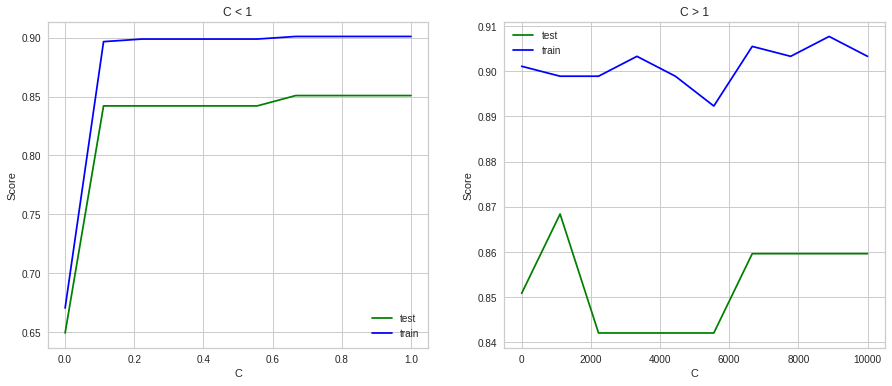

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot( C1, test1, label = "test", color ="green")   
plt.plot(C1,train1, label = "train", color ="blue")
plt.title("С < 1")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()

plt.subplot(122)
plt.plot( C2, test2, label = "test", color ="green")   
plt.plot(C2,train2, label = "train", color ="blue")
plt.title("C > 1")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()

Train:  0.9010989010989011
Test 0.8421052631578947


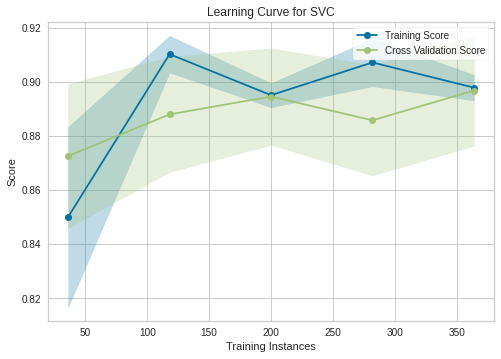

In [ ]:
clf = SVC(kernel = 'linear', C = 0.1)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

Train:  0.9010989010989011
Test 0.8421052631578947


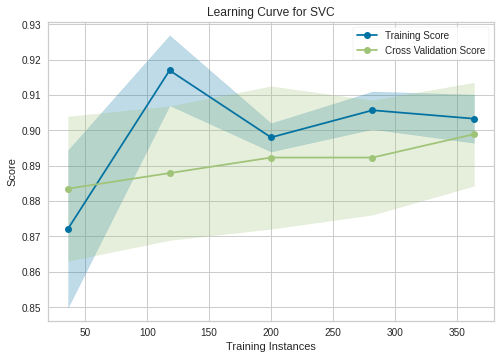

In [ ]:
clf = SVC(kernel = 'linear', C = 5000)
clf.fit(x_train, y_train)

print('Train: ', clf.score(x_train, y_train))
print('Test',clf.score(x_test, y_test))

learncurve = LearningCurve(clf).fit(X, y)
learncurve.show()

# Доп

Повторите такой же анализ для полиномиального ядра и степени полинома как гиперпараметра. Прокомментируйте кривые обучения для случаев недо-и переобучения.

In [ ]:
deg = list(range(0, 7))
test = []
train = []
for d in range(len(deg)):
    clf = SVC(kernel = 'poly', degree = d)
    clf.fit(x_train, y_train)
    train.append(clf.score(x_train, y_train))
    test.append(clf.score(x_test, y_test))


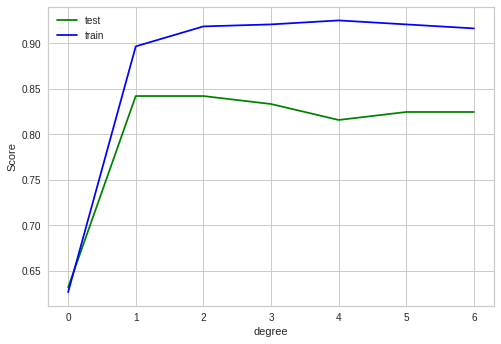

In [ ]:
plt.plot( deg, test, label = "test", color ="green")   
plt.plot(deg,train, label = "train", color ="blue")
plt.xlabel("degree")
plt.ylabel("Score")
plt.legend()

Исследуйте зависимость степени обученности модели от значения других гиперпараметров различных классификаторов, реализованных в sklearn. Постройте кривые обучения в зависимости от значения этих параметров.

In [ ]:
gammas1 = list(np.linspace(0.0001, 1, num = 5)) 
gammas2 = list(np.linspace(1, 100, num = 10 ))
test1 = []
train1 = []
test2 = []
train2 = []
for gamma in gammas1:
    clf = SVC(kernel='rbf', gamma=gamma)
    clf.fit(x_train, y_train)
    train1.append(clf.score(x_train, y_train))
    test1.append(clf.score(x_test, y_test))

for gamma in gammas2:    
    clf = SVC(kernel='rbf', gamma=gamma)
    clf.fit(x_train, y_train)
    train2.append(clf.score(x_train, y_train))
    test2.append(clf.score(x_test, y_test))


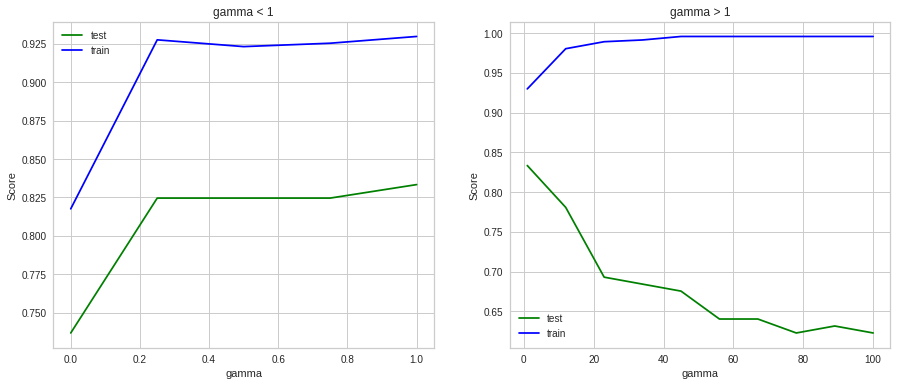

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot( gammas1, test1, label = "test", color ="green")   
plt.plot(gammas1,train1, label = "train", color ="blue")
plt.title("gamma < 1")
plt.xlabel("gamma")
plt.ylabel("Score")
plt.legend()

plt.subplot(122)
plt.plot( gammas2, test2, label = "test", color ="green")   
plt.plot(gammas2,train2, label = "train", color ="blue")
plt.title("gamma > 1")
plt.xlabel("gamma")
plt.ylabel("Score")
plt.legend()

Повторите данное исследование на полном датасете. Сделайте выводы об оптимальной регуляризации моделей.

In [ ]:
X = cancer.data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
C1 = list(np.linspace(0.0001, 1, num = 10)) 
C2 = list(np.linspace(1, 10000, num = 10 ))
test1 = []
train1 = []
test2 = []
train2 = []
for c in range(len(C1)):
    clf = SVC(C = C1[c])
    clf.fit(x_train, y_train)
    train1.append(clf.score(x_train, y_train))
    test1.append(clf.score(x_test, y_test))
    
    clf = SVC(C = C2[c])
    clf.fit(x_train, y_train)
    train2.append(clf.score(x_train, y_train))
    test2.append(clf.score(x_test, y_test))


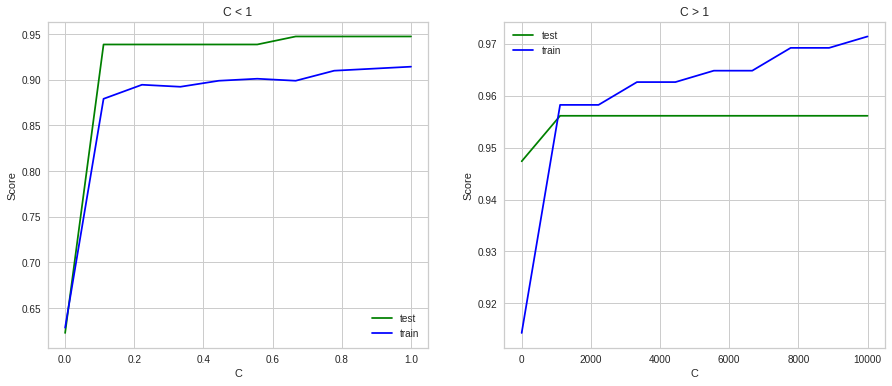

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot( C1, test1, label = "test", color ="green")   
plt.plot(C1,train1, label = "train", color ="blue")
plt.title("С < 1")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()

plt.subplot(122)
plt.plot( C2, test2, label = "test", color ="green")   
plt.plot(C2,train2, label = "train", color ="blue")
plt.title("C > 1")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()